In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from utils.file_utils import getFilenames

from scipy import stats


def freedman_diaconis(data, returnas="width"):
    """
    Use Freedman Diaconis rule to compute optimal histogram bin width. 
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively. 

    http://www.jtrive.com/determining-histogram-bin-width-using-the-freedman-diaconis-rule.html
    
    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin. 
        If "bins", return the number of bins suggested by rule.
    """
    data = np.asarray(data, dtype=np.float_)
    IQR  = stats.iqr(data, rng=(25, 75), scale="raw", nan_policy="omit")
    N    = data.size
    bw   = (2 * IQR) / np.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return(result)

In [3]:


filelist = getFilenames("../experiments/", queries=[".txt"])
print(len(filelist))

2019


In [15]:
dataframe = []

FILENAME_PARAM_DEPTH = -7

for filepath in filelist:
    try:
        df = pd.read_csv(filepath, header=None)
    # If the file is empty (no marked points, skip)
    except Exception:
        continue
    df = df.rename(columns={0:"X"})
    file_basename = os.path.basename(filepath)
    # df['filename'] = file_basename
    split_filename = file_basename.split("_")
    # print(split_filename[FILENAME_PARAM_DEPTH:])

    #### MODIFY AS NECESSARY DEPENDING ON HOW LONG THE FILENAME IS ####
    nHoles, hole_width, pRX, pI, pO, sim_ID, timestamp = split_filename[FILENAME_PARAM_DEPTH:]
    timestamp = int(timestamp.replace(".txt",""))
    df["nHoles"] = int(nHoles[2:])
    df["hole_width"] = float(hole_width[1:])
    df["pRX"] = float(pRX[3:])
    df["pI"] = float(pI[2:])
    df["pO"] = float(pO[2:])
    df["sim_ID"] = int(sim_ID[1:])
    df["timestamp"] = timestamp
    dataframe +=[ df]
    
dataframe = pd.concat(dataframe)
dataframe.head()

,X,filename,nHoles,hole_width,pRX,pI,pO,sim_ID,timestamp
0,-0.818363,2023070619504900004_testing_runs_nH1_w0.010000...,1,0.01,0.00001,0.000005,0.000005,0,120
0,-0.818363,2023070619504900004_testing_runs_nH1_w0.010000...,1,0.01,0.00001,0.000005,0.000005,0,180
0,-0.818363,2023070619504900004_testing_runs_nH1_w0.010000...,1,0.01,0.00001,0.000005,0.000005,0,240
1,13.363000,2023070619504900004_testing_runs_nH1_w0.010000...,1,0.01,0.00001,0.000005,0.000005,0,240
2,-3.234460,2023070619504900004_testing_runs_nH1_w0.010000...,1,0.01,0.00001,0.000005,0.000005,0,240


In [16]:
dataframe.to_csv("test.csv")

In [8]:
np.unique(dataframe["pRX"])

array(['pRX0.000010', 'pRX0.000100', 'pRX0.001000', 'pRX0.010000'],
      dtype=object)

In [14]:
a = "nH1"
a[1:]

'H1'

/Users/gsun/.virtualenvs/main/lib/python3.8/site-packages/scipy/stats/_stats_py.py:2841: VisibleDeprecationWarning: use of scale='raw' is deprecated, use scale=1.0 instead
  warnings.warn(


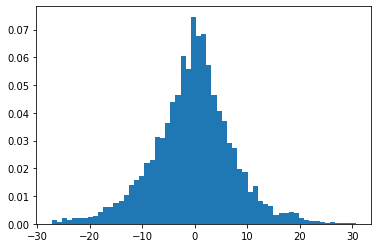

In [12]:
plotting_data = dataframe[(dataframe["timestamp"]==300)&(dataframe["pRX"]=="pRX0.000100")]['X']
nbins = freedman_diaconis(plotting_data, "bins")
_= plt.hist(plotting_data, bins=nbins, density=True)

In [63]:
nbins

239